# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata,study_results, on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [49]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [50]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

# Get the unique Mouse IDs of the duplicate mice
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
print("duplicate IDs: ", duplicate_mouse_ids)

duplicate IDs:  ['g989']


In [51]:
# Optional: Get all the data for the duplicate mouse ID. 

In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_id = 'g989'
clean_df = combined_data[combined_data['Mouse ID'] != mouse_id]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [53]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group the data by the regimen column and calculate the summary statistics
mean_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

drug_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor, "Median Tumor Volume": median_tumor,
                            "Tumor Volume Variance": var_tumor, "Tumor Volume Std. Variance": std_tumor,
                            "Tumor Volume Std. Error": sem_tumor})
# Display the summary statistics table
drug_summary
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Variance,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drugs_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drugs_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

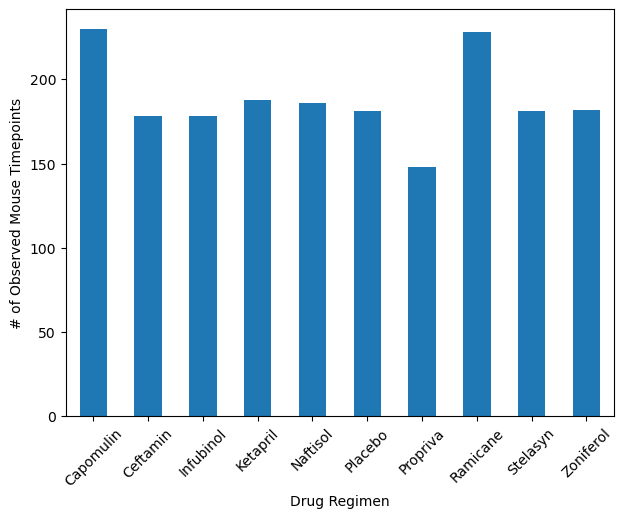

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_df.groupby('Drug Regimen').size()
drug_regimen.plot.bar(rot=0)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

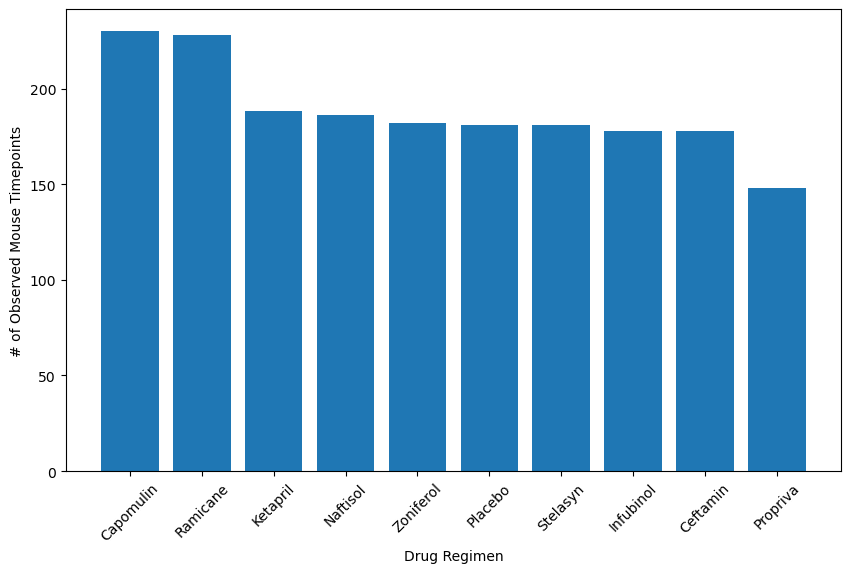

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_df["Drug Regimen"].value_counts()

# Get the drug regimens and their corresponding counts
regimens = drug_counts.index
counts = drug_counts.values

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(regimens, counts)

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

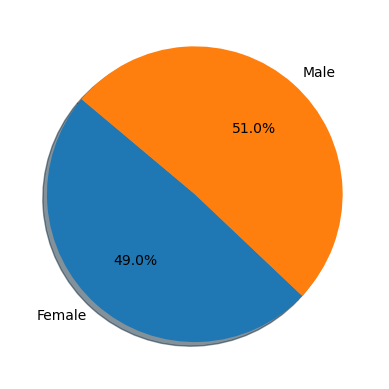

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = clean_df.groupby('Sex').size()
labels = ["Female","Male"]
plt.pie(gender_pie,labels=labels,autopct="%1.1f%%",shadow=True,startangle=140)
plt.show()

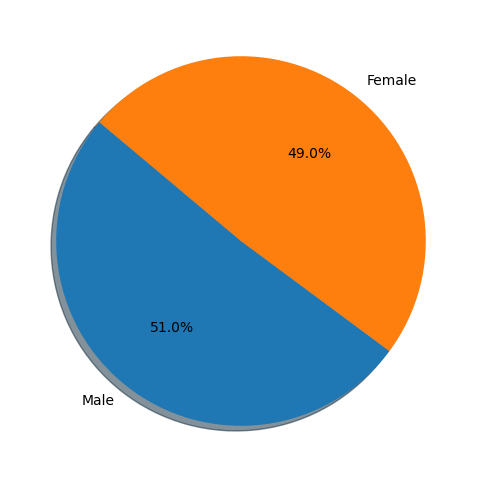

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group the data by sex and count the number of mice
sex_counts = clean_df["Sex"].value_counts()

# Get the sex labels and their corresponding counts
sex_labels = sex_counts.index
counts = sex_counts.values

# Create the pie plot
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=sex_labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
grouped_df = clean_df.groupby("Mouse ID")
# Start by getting the last (greatest) timepoint for each mouse
timepoint = grouped_df["Timepoint"].max()
grouped_timepoint_df = pd.DataFrame(timepoint)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, grouped_timepoint_df, on=["Mouse ID", "Timepoint"])

In [61]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug_regimen in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = clean_df.loc[clean_df["Drug Regimen"]== drug_regimen, "Tumor Volume (mm3)"]
    # add subset
    tumor_vol_list.append(tumor_vol)
# Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound)|(tumor_vol > upper_bound)]
    outliers
    print(f"{drug_regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


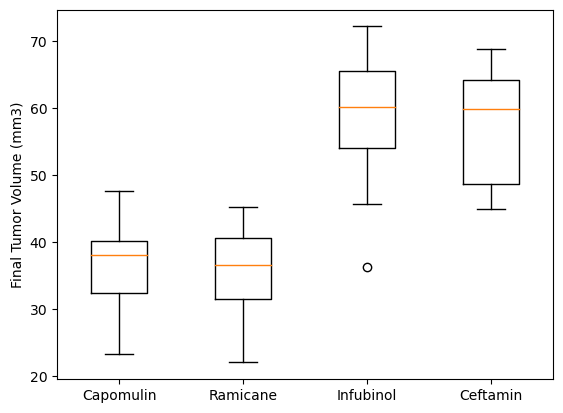

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = [tumor_volumes[0], tumor_volumes[1], tumor_volumes[2], tumor_volumes[3]]

# Step 2: Create a list of treatment names
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Step 3: Create a figure and axis object
fig, ax = plt.subplots()

# Step 4: Generate the box plot
boxplot = ax.boxplot(data, labels=labels)

# Step 5: Customize the appearance of the box plot
boxplot["fliers"]

# Step 6: Add labels and title
ax.set_ylabel("Final Tumor Volume (mm3)")

# Step 7: Show the plot
plt.show()

## Line and Scatter Plots

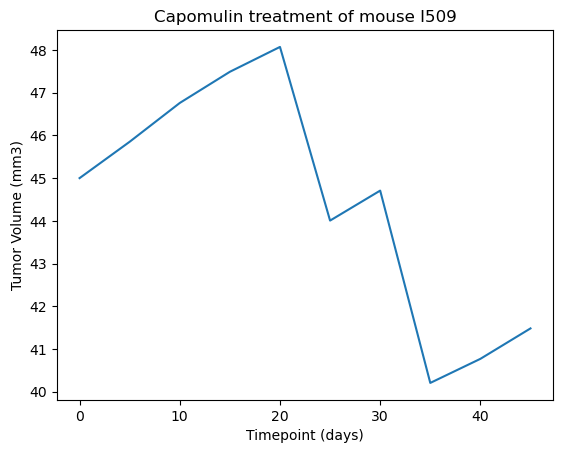

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_df[clean_df["Drug Regimen"] == 'Capomulin']
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == "l509"]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse I509")
plt.show()

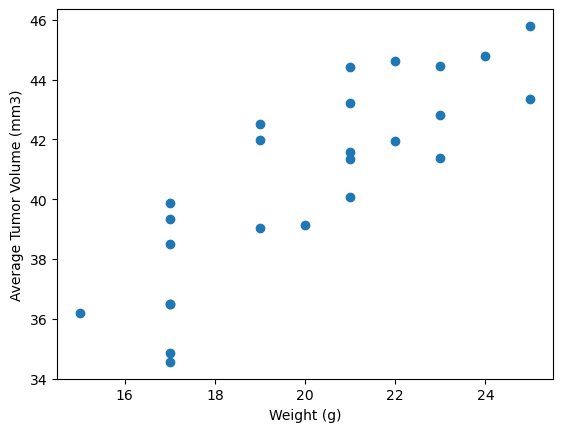

In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()
plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


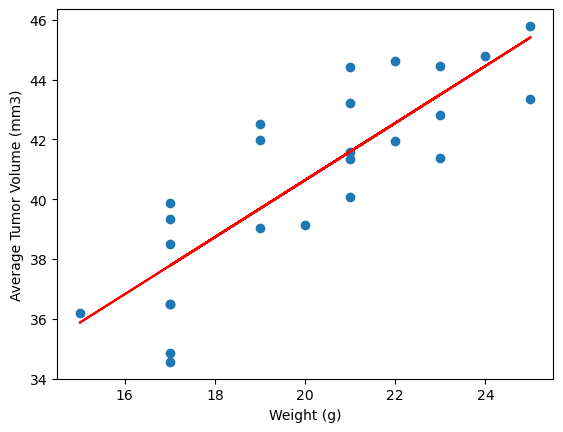

In [65]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = scatter_data["Weight (g)"]
y_values = scatter_data["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regression = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regression,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()